In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from datetime import datetime
from config import weather_api_key
from citipy import citipy

In [2]:

requests.__version__

'2.27.1'

In [7]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)

lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)

lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)


In [8]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

593

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1

set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
  
    #Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")     

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | jalu
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | carutapera
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | praia
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | yen bai
Processing Record 12 of Set 1 | challans
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | aykhal
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | aloleng
Processing Record 18 of Set 1 | dibulla
Processing Record 19 of Set 1 | mitsamiouli
Processing Record 20 of Set 1 | san cristobal
Processing Record 21 of Set 1 | yulara
Processing Record 22 of Set 1 | kerki
City not fou

Processing Record 39 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 40 of Set 4 | labuhan
Processing Record 41 of Set 4 | yining
Processing Record 42 of Set 4 | tilichiki
Processing Record 43 of Set 4 | okhotsk
Processing Record 44 of Set 4 | svetlogorsk
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | hawalli
Processing Record 47 of Set 4 | northam
Processing Record 48 of Set 4 | nowy dwor gdanski
Processing Record 49 of Set 4 | creston
Processing Record 50 of Set 4 | lasa
Processing Record 1 of Set 5 | santa maria
Processing Record 2 of Set 5 | weihai
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | koumac
Processing Record 5 of Set 5 | ribeira grande
Processing Record 6 of Set 5 | taybad
Processing Record 7 of Set 5 | durban
Processing Record 8 of Set 5 | atascocita
Processing Record 9 of Set 5 | saint george
Processing Record 10 of Set 5 | port blair
Processing Record 11 of Set 5 | contai
Processing Record 12 of Set 5

Processing Record 25 of Set 8 | vlasikha
Processing Record 26 of Set 8 | teguise
Processing Record 27 of Set 8 | ankazoabo
Processing Record 28 of Set 8 | mange
Processing Record 29 of Set 8 | solnechnyy
Processing Record 30 of Set 8 | vernon
Processing Record 31 of Set 8 | sabang
Processing Record 32 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 33 of Set 8 | noyabrsk
Processing Record 34 of Set 8 | kaitangata
Processing Record 35 of Set 8 | ajdabiya
Processing Record 36 of Set 8 | murgab
Processing Record 37 of Set 8 | meulaboh
Processing Record 38 of Set 8 | jiwani
Processing Record 39 of Set 8 | brewster
Processing Record 40 of Set 8 | goderich
Processing Record 41 of Set 8 | bayanday
Processing Record 42 of Set 8 | yaring
Processing Record 43 of Set 8 | port-gentil
Processing Record 44 of Set 8 | nagayo
Processing Record 45 of Set 8 | laurel
Processing Record 46 of Set 8 | warqla
City not found. Skipping...
Processing Record 47 of Set 8 | sehithwa
Processing Re

Processing Record 13 of Set 12 | avdiyivka
Processing Record 14 of Set 12 | itoman
Processing Record 15 of Set 12 | dwarka
Processing Record 16 of Set 12 | buala
Processing Record 17 of Set 12 | valparaiso
Processing Record 18 of Set 12 | lerwick
Processing Record 19 of Set 12 | gornyy
Processing Record 20 of Set 12 | ilulissat
Processing Record 21 of Set 12 | pacific grove
Processing Record 22 of Set 12 | madimba
Processing Record 23 of Set 12 | dukat
Processing Record 24 of Set 12 | le port
Processing Record 25 of Set 12 | kaliyaganj
Processing Record 26 of Set 12 | vaitape
Processing Record 27 of Set 12 | novoyegoryevskoye
City not found. Skipping...
Processing Record 28 of Set 12 | nizhniy tagil
Processing Record 29 of Set 12 | asasa
Processing Record 30 of Set 12 | toora-khem
Processing Record 31 of Set 12 | emerald
Processing Record 32 of Set 12 | baghdad
Processing Record 33 of Set 12 | zaria
Processing Record 34 of Set 12 | barcelona
Processing Record 35 of Set 12 | palabuhanra

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,55.92,71,75,16.11,CA,2022-09-21 18:45:45
1,Puerto Ayora,-0.7393,-90.3518,76.96,87,92,11.01,EC,2022-09-21 18:45:46
2,Jalu,29.0331,21.5482,92.91,13,5,7.76,LY,2022-09-21 18:45:46
3,Bengkulu,-3.8004,102.2655,74.48,90,44,3.02,ID,2022-09-21 18:41:24
4,Punta Arenas,-53.1500,-70.9167,53.62,62,0,13.80,CL,2022-09-21 18:42:37
5,Carutapera,-1.1950,-46.0200,85.68,58,23,10.56,BR,2022-09-21 18:45:47
6,Saint-Philippe,-21.3585,55.7679,69.39,79,40,11.74,RE,2022-09-21 18:45:47
7,Praia,14.9215,-23.5087,82.94,65,75,16.11,CV,2022-09-21 18:44:16
8,Jamestown,42.0970,-79.2353,78.39,73,75,8.05,US,2022-09-21 18:45:48
9,Yen Bai,21.7000,104.8667,74.41,96,100,1.97,VN,2022-09-21 18:45:48


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]

In [20]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-09-21 18:45:45,62.4560,-114.3525,55.92,71,75,16.11
1,Puerto Ayora,EC,2022-09-21 18:45:46,-0.7393,-90.3518,76.96,87,92,11.01
2,Jalu,LY,2022-09-21 18:45:46,29.0331,21.5482,92.91,13,5,7.76
3,Bengkulu,ID,2022-09-21 18:41:24,-3.8004,102.2655,74.48,90,44,3.02
4,Punta Arenas,CL,2022-09-21 18:42:37,-53.1500,-70.9167,53.62,62,0,13.80
...,...,...,...,...,...,...,...,...,...
536,Liuzhou,CN,2022-09-21 18:59:55,24.3126,109.3892,77.70,82,50,1.61
537,Atar,MR,2022-09-21 18:59:55,20.5169,-13.0499,99.54,26,10,14.58
538,Kansas City,US,2022-09-21 18:58:39,39.0997,-94.5786,91.53,61,100,11.99
539,Vrangel,RU,2022-09-21 18:59:56,42.7297,133.0839,57.24,77,0,2.77


In [21]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

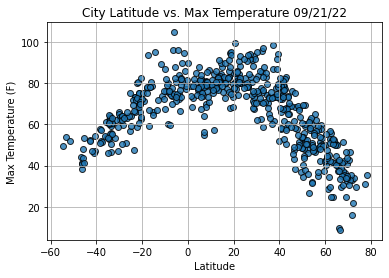

In [28]:
# Import the time module

import time

# Build the scatter plot for latitude vs max temperature.

plt.scatter(lats,
           
           max_temps,
           
           edgecolor = "black", linewidth = 1, marker = "o",
           
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

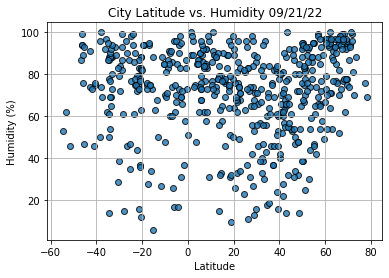

In [29]:
plt.scatter(lats,
           
           humidity,
           
           edgecolor = "black", linewidth = 1, marker = "o",
           
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

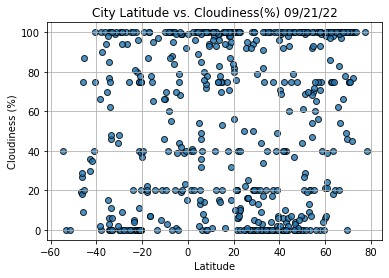

In [30]:
plt.scatter(lats,
           
           cloudiness,
           
           edgecolor = "black", linewidth = 1, marker = "o",
           
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness(%) " + time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

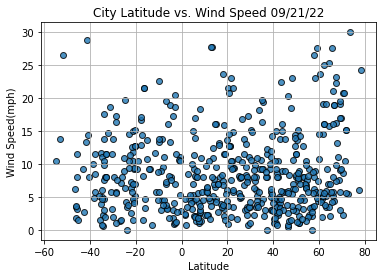

In [31]:
plt.scatter(lats,
           
           wind_speed,
           
           edgecolor = "black", linewidth = 1, marker = "o",
           
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))

plt.ylabel("Wind Speed(mph)")

plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [37]:
# Import linear regression from the SciPy stats module

from scipy.stats import linregress

In [66]:
# Create a function to create perform linear regression on the weather data

# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()
    
    print(f"The r-value is: {r_value:.3f}")

In [67]:
index13 = city_data_df.loc[13]

index13

City                       Aykhal
Country                        RU
Date          2022-09-21 18:45:50
Lat                          66.0
Lng                         111.5
Max Temp                     9.52
Humidity                       95
Cloudiness                     83
Wind Speed                   5.19
Name: 13, dtype: object

In [68]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-09-21 18:45:45,62.4560,-114.3525,55.92,71,75,16.11
2,Jalu,LY,2022-09-21 18:45:46,29.0331,21.5482,92.91,13,5,7.76
7,Praia,CV,2022-09-21 18:44:16,14.9215,-23.5087,82.94,65,75,16.11
8,Jamestown,US,2022-09-21 18:45:48,42.0970,-79.2353,78.39,73,75,8.05
9,Yen Bai,VN,2022-09-21 18:45:48,21.7000,104.8667,74.41,96,100,1.97


In [69]:
# Create Northern and Southern Hemisphere Dataframes.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

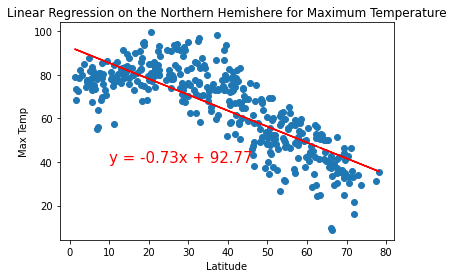

The r-value is: -0.797


In [70]:
# Linear regression on the Northern Hemisphere for Max Temp

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemishere for Maximum Temperature",
                       "Max Temp", (10, 40))



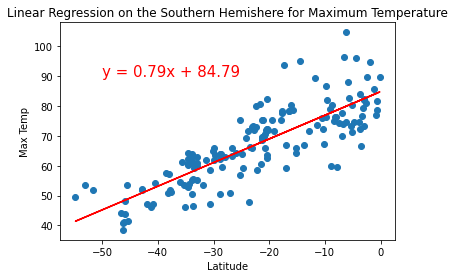

The r-value is: 0.822


In [71]:
# Linear regression on the Southern Hemisphere  Max Temp

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemishere for Maximum Temperature",
                       "Max Temp", (-50, 90))



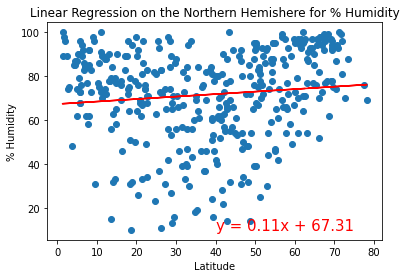

The r-value is: 0.110


In [72]:
# Linear regression on the Northern Hemisphere for % Humidity

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemishere for % Humidity",
                       "% Humidity", (40, 10))


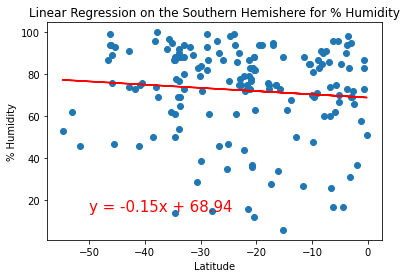

The r-value is: -0.095


In [73]:
# Linear regression on the Southern Hemisphere for % Humidity

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemishere for % Humidity",
                       "% Humidity", (-50, 15))



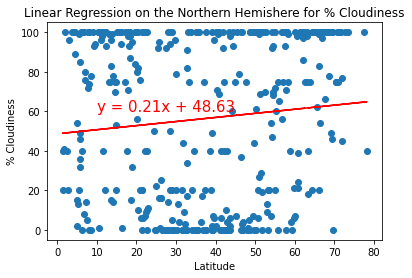

The r-value is: 0.102


In [75]:
# Linear regression on the Northern Hemisphere for cloudiness

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemishere for % Cloudiness",
                       "% Cloudiness", (10, 60))



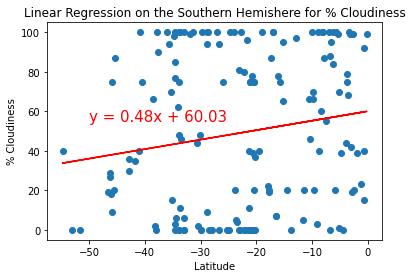

The r-value is: 0.164


In [79]:
# Linear regression on the Southern Hemisphere for cloudiness

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemishere for % Cloudiness",
                       "% Cloudiness", (-50, 55))



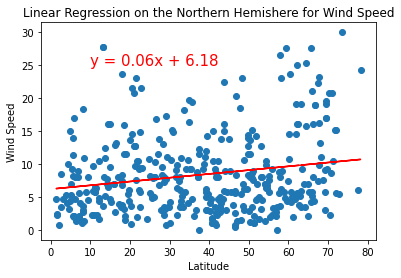

The r-value is: 0.192


In [81]:
# Linear regression on the Northern Hemisphere for wind speed

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemishere for Wind Speed",
                       "Wind Speed", (10, 25))


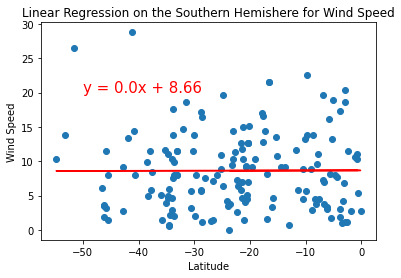

The r-value is: 0.003


In [83]:
# Linear regression on the Southern Hemisphere for cloudiness

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemishere for Wind Speed",
                       "Wind Speed", (-50, 20))

